In [43]:
from pandas_datareader import data as pdr
from datetime import date
import datetime
import yfinance as yf
yf.pdr_override()
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
from random import random
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.metrics import mean_squared_error
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
import scipy.optimize as spo
import math

# Data Collection

In [44]:
#Data Collection for time series and clustering 
#The ticker list has all 29 stocks in the Dow Jones Industrial Average
today = date.today()
ticker_list=['MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT', 'DIS']
start_date=datetime.datetime.strptime('2018-09-30','%Y-%m-%d')
end_date=datetime.datetime.strptime('2022-09-30','%Y-%m-%d')

In [45]:
#Function to get Data from Yahoo Finance and create the dataframe
stock_df = pd.DataFrame()

def getData(ticker):
    print (ticker)
    data = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)
    data['ticker'] = ticker
    global stock_df 
    stock_df = stock_df.append(data)

for tik in ticker_list:
    getData(tik)
stock_df.reset_index(inplace=True)

MMM
[*********************100%***********************]  1 of 1 completed
AXP


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
AMGN


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
AAPL


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
BA


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
CAT


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
CVX


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
CSCO


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
KO


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
GS


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
HD


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
HON


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
IBM


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
INTC


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
JNJ


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
JPM


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
MCD


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
MRK


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
MSFT


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
NKE


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
PG


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
CRM


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
TRV


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
UNH


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
VZ


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
V


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
WBA


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
WMT


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed
DIS


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/363060002.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_df = stock_df.append(data)


In [69]:
stock_df
stock_df.to_csv('stock.csv', index='False')

In [47]:
#Function to get Actual Data from Yahoo Finance for testing the time series model
Actuals_df = pd.DataFrame()
start_date_Actuals=datetime.datetime.strptime('2022-10-01','%Y-%m-%d')
end_date_Actuals=datetime.datetime.strptime('2022-11-01','%Y-%m-%d')
def getDataActuals(ticker):
    print (ticker)
    data = pdr.get_data_yahoo(ticker, start=start_date_Actuals, end=end_date_Actuals)
    data['ticker'] = ticker
    global Actuals_df
    Actuals_df = Actuals_df.append(data)

In [48]:
#Function to predict Stock price using SARIMA time series model
def make_predictions(ticker, predicted_df, train_data, test_data,n_test, p, d, q, P=0, D=0, Q=0, s=0):
    train = train_data.values.tolist()
    test = test_data.values.tolist()
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(train, order = (p, d, q), seasonal_order = (P, D, Q, s))
        fitted_model = model.fit()
        predicted = fitted_model.forecast()
        predictions.append(predicted[-1])
        train.append(test[t])
    # Evaluate predictions
    error = mean_squared_error(test, predictions)
    corr = np.corrcoef(test, predictions)[1, 0]
    
    predicted_df.loc[predicted_df['Stock'] == ticker,['Predicted Price Increase']] = predictions[-1] - predictions[0]
    predicted_df.loc[predicted_df['Stock'] == ticker,['Predicted Percent Increase']] = ((predictions[-1] - predictions[0]) / predictions[0])*100
    predicted_df.loc[predicted_df['Stock'] == ticker,['Actual Price Increase']] = test[-1] - test[0]
    predicted_df.loc[predicted_df['Stock'] == ticker,['Actual Percent Increase']] = ((test[-1] - test[0]) / test[0])*100
    predicted_df.loc[predicted_df['Stock'] == ticker,['Correlation']] = corr
    predicted_df.loc[predicted_df['Stock'] == ticker,['MSE']] = error
    
    print("Price Increase", predictions[-1] - predictions[0])
    print("Percent Increase",((predictions[-1] - predictions[0]) / predictions[0])*100)
    print('MSE: %.3f' % error)
    print('Correlation: %.3f' % corr)
    print(ticker)
    # Plot results
    plt.plot(test)
    plt.plot(predictions, color='red')
    plt.title('Predictions and Actuals for {} '.format(ticker))
    plt.xlabel('Days')
    plt.ylabel('Stock Price')
    plt.show()

In [49]:
#Function creating the dataframe which stores the predicted changes, actual changes, correlation, and MSE
global predicted_df 
data = {'Stock': ['MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT', 'DIS'],
       'Predicted Price Increase':[0]*29,
       'Predicted Percent Increase':[0]*29,
       'Actual Price Increase': [0]*29,
       'Actual Percent Increase':[0]*29, 
       'Correlation':[0]*29,
       'MSE': [0]*29}
predicted_df = pd.DataFrame(data)

# Clustering

In [50]:
# Creating a new data frame for clustering
#pre processing the data frame by dropping NA values and conerting it into the wide format
stock_df_annual = stock_df[['Date', 'Adj Close', 'ticker']]
stock_df_annual = pd.pivot_table(stock_df_annual, columns = 'ticker', values = 'Adj Close', index = ['Date']).reset_index()
stock_df_annual = stock_df_annual.set_index('Date').iloc[:,:].resample('Y').last().pct_change()
stock_df_annual.reset_index(inplace = True)
stock_df_annual = pd.melt(stock_df_annual, id_vars = ['Date'],  var_name='stock', value_name ='annual_returns')
stock_df_annual = stock_df_annual.dropna()
stock_df_annual['annual_returns'] = stock_df_annual['annual_returns'] * 100
stock_df_annual

,Date,stock,annual_returns
1,2019-12-31,AAPL,88.957855
2,2020-12-31,AAPL,82.306754
3,2021-12-31,AAPL,34.648191
4,2022-12-31,AAPL,-19.429195
6,2019-12-31,AMGN,27.601112
...,...,...,...
139,2022-12-31,WBA,-37.450783
141,2019-12-31,WMT,30.162935
142,2020-12-31,WMT,23.322399
143,2021-12-31,WMT,1.970841


In [51]:
# Calculate average annual returns of all years grouped by stocks
stock_df_avg = stock_df_annual[['stock', 'annual_returns']].groupby('stock').mean()
stock_df_avg

,annual_returns
stock,
AAPL,46.620901
AMGN,7.626433
AXP,13.312944
BA,-18.564332
CAT,11.004830
CRM,6.883742
CSCO,5.377537
CVX,15.597917
DIS,1.797516


In [52]:
# Normalizing all data to scale 
scaler = StandardScaler()
scaler.fit(stock_df_avg['annual_returns'].values.reshape(-1,1))
x_scaled_avg = scaler.transform(stock_df_avg['annual_returns'].values.reshape(-1,1) )

# K-Means Clustering


In [53]:
#K-Means clustering (random initialization, 10 iterations, 3 clusters)
clustering = KMeans(n_clusters = 3, init = 'random', n_init = 10).fit(x_scaled_avg)
clusters = clustering.labels_
centers = clustering.cluster_centers_

In [54]:
#The silhouette coefficient is recorded to compare performance between different models
stock_df_avg.reset_index(inplace = True)
print(metrics.silhouette_score(x_scaled_avg, clusters, metric = "euclidean"))

0.6411357322623087


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/2036218881.py:11: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(stock_df_avg.loc[i,'stock'],(x, y),textcoords='offset points', arrowprops=dict(arrowstyle='-|>'), horizontalalignment='right', verticalalignment='top')


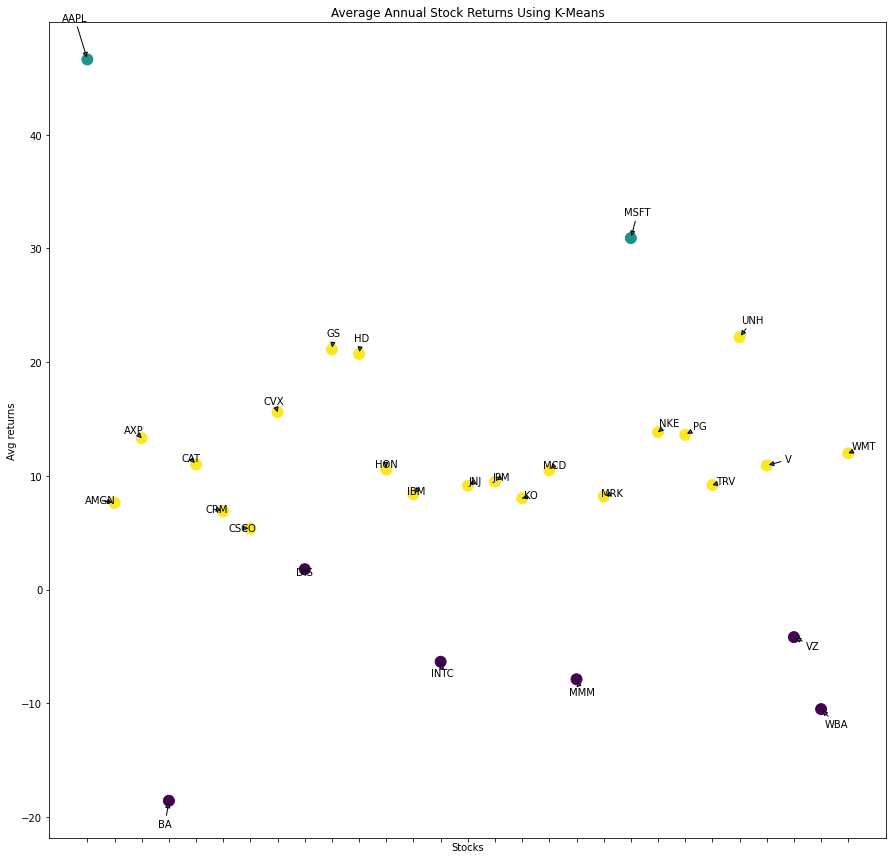

In [55]:
# Plot average returns of all stocks to show high performing, average performing and low performing stocks
fig, ax = plt.subplots(figsize=(15,15))
plt.scatter(stock_df_avg['stock'],stock_df_avg['annual_returns'],  c= clusters, s = 120)
plt.title('Average Annual Stock Returns Using K-Means')
plt.ylabel('Avg returns')
plt.xlabel('Stocks')
ax.tick_params(labelbottom=False)  
for i, j in enumerate(stock_df_avg['stock']):
    x = i
    y = stock_df_avg.loc[i,'annual_returns']
    plt.annotate(stock_df_avg.loc[i,'stock'],(x, y),textcoords='offset points', arrowprops=dict(arrowstyle='-|>'), horizontalalignment='right', verticalalignment='top')
              
plt.show()

In [56]:
# Apple is removed from the dataset since it is an outlier
stock_df_avg = stock_df_annual[['stock', 'annual_returns']].groupby('stock').mean()
stock_df_avg = stock_df_avg.drop(index=('AAPL'))
stock_df_avg

,annual_returns
stock,
AMGN,7.626433
AXP,13.312944
BA,-18.564332
CAT,11.004830
CRM,6.883742
CSCO,5.377537
CVX,15.597917
DIS,1.797516
GS,21.118190


In [57]:
# Normalizing all data to scale 
scaler = StandardScaler()
scaler.fit(stock_df_avg['annual_returns'].values.reshape(-1,1))
x_scaled_avg = scaler.transform(stock_df_avg['annual_returns'].values.reshape(-1,1) )

In [58]:
#K-Means clustering (random initialization, 10 iterations, 3 clusters)
clustering = KMeans(n_clusters = 3, init = 'random', n_init = 10).fit(x_scaled_avg)
clusters = clustering.labels_
centers = clustering.cluster_centers_

In [59]:
#The silhouette coefficient is recorded to compare performance between different models
stock_df_avg.reset_index(inplace = True)
print(metrics.silhouette_score(x_scaled_avg, clusters, metric = "euclidean"))

0.6811208983431106


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/465067052.py:11: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(stock_df_avg.loc[i,'stock'],(x, y),textcoords='offset points', arrowprops=dict(arrowstyle='-|>'), horizontalalignment='right', verticalalignment='top')


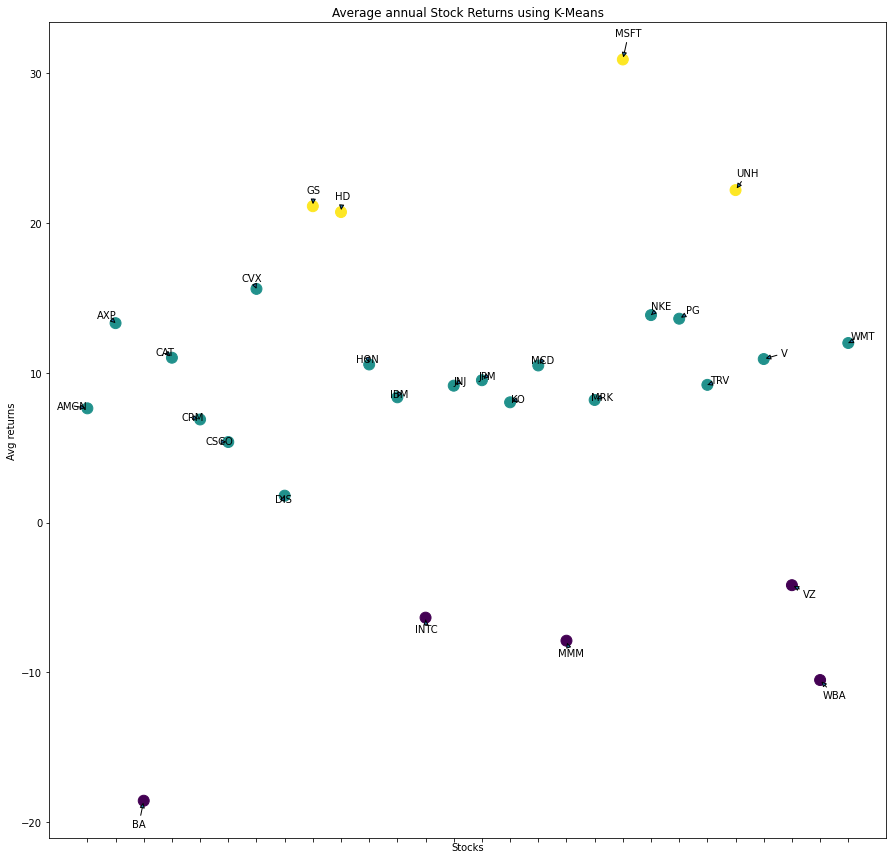

In [60]:
# Plot average returns of all stocks to show high performing, average performing and low performing stocks
fig, ax = plt.subplots(figsize=(15,15))
plt.scatter(stock_df_avg['stock'],stock_df_avg['annual_returns'],  c= clusters, s = 120)
plt.title('Average annual Stock Returns using K-Means')
plt.ylabel('Avg returns')
plt.xlabel('Stocks')
ax.tick_params(labelbottom=False)  
for i, j in enumerate(stock_df_avg['stock']):
    x = i
    y = stock_df_avg.loc[i,'annual_returns']
    plt.annotate(stock_df_avg.loc[i,'stock'],(x, y),textcoords='offset points', arrowprops=dict(arrowstyle='-|>'), horizontalalignment='right', verticalalignment='top')
              
plt.show()

# Hierarchical Clustering

In [61]:
#single linkage clustering
clustering = linkage(x_scaled_avg, method = "single", metric = "euclidean")
clusters = fcluster(clustering, 3, criterion = 'maxclust')
print(metrics.silhouette_score(x_scaled_avg, clusters, metric = "euclidean"))

0.377191737145108


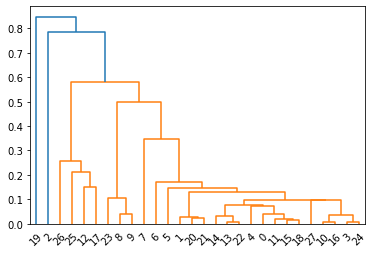

In [62]:
#Plotting the dandogram
plt.figure()
dendrogram(clustering)
plt.show()

/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/2792917808.py:12: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(stock_df_avg.loc[i,'stock'],(x, y),textcoords='offset points', arrowprops=dict(arrowstyle='-|>'), horizontalalignment='right', verticalalignment='top')


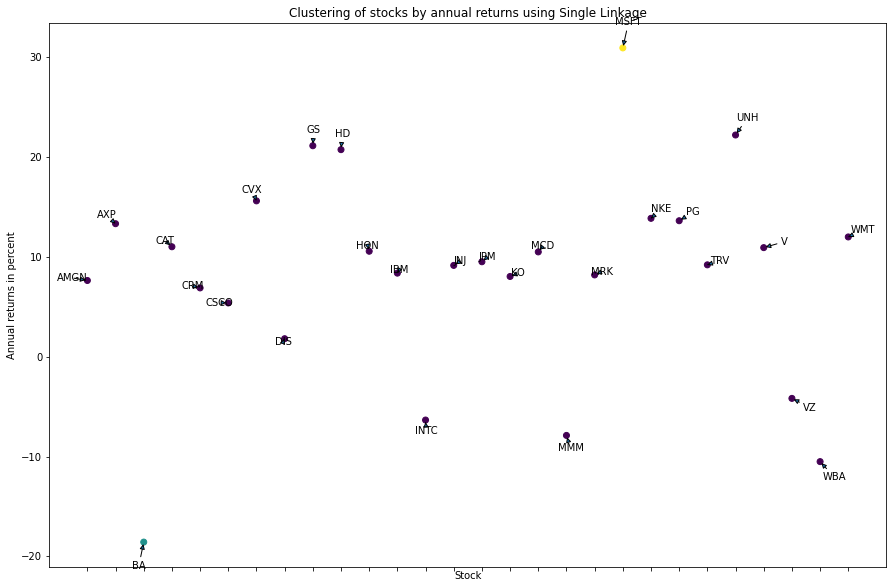

In [63]:
#Scatter plot to show clusters created for each stock every year
plt.figure(figsize=(15, 10))
plt.scatter(stock_df_avg['stock'], stock_df_avg['annual_returns'], c= clusters)
plt.xlabel('Stock')
plt.ylabel('Annual returns in percent')
plt.title('Clustering of stocks by annual returns using Single Linkage')
plt.tick_params(labelbottom=False) 

for i, j in enumerate(stock_df_avg['stock']):
    x = i
    y = stock_df_avg.loc[i,'annual_returns']
    plt.annotate(stock_df_avg.loc[i,'stock'],(x, y),textcoords='offset points', arrowprops=dict(arrowstyle='-|>'), horizontalalignment='right', verticalalignment='top')

plt.show()

In [64]:
clustering = linkage(x_scaled_avg, method = "complete", metric = "euclidean")
clusters = fcluster(clustering, 3, criterion = 'maxclust')
print(metrics.silhouette_score(x_scaled_avg, clusters, metric = "euclidean"))

0.6811208983431106


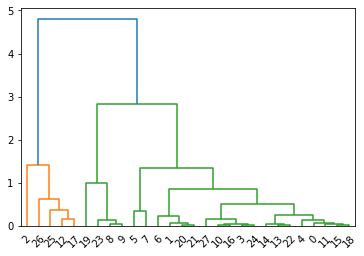

In [65]:
#Plotting the dandogram
plt.figure()
dendrogram(clustering)
plt.show()

/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/223263701.py:12: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(stock_df_avg.loc[i,'stock'],(x, y),textcoords='offset points', arrowprops=dict(arrowstyle='-|>'), horizontalalignment='right', verticalalignment='top')


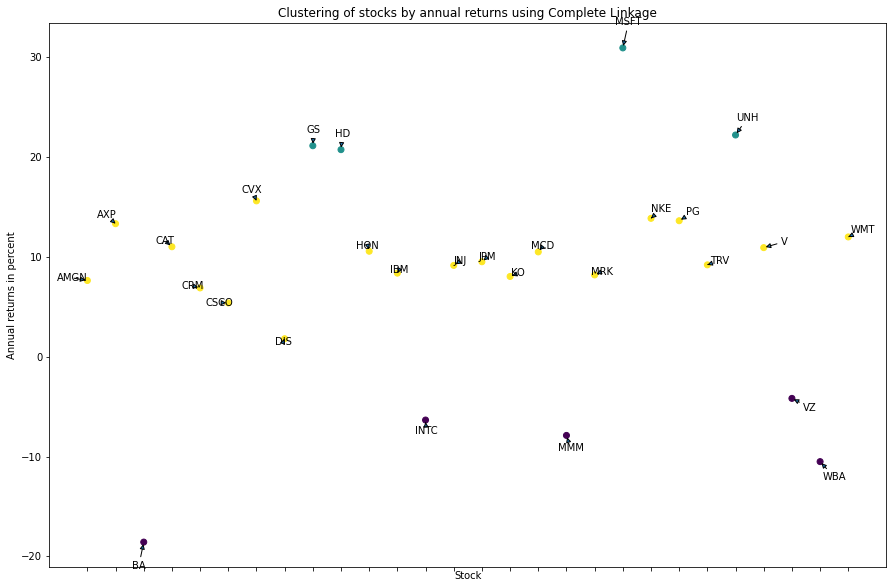

In [66]:
#Scatter plot to show clusters created for each stock every year
plt.figure(figsize=(15, 10))
plt.scatter(stock_df_avg['stock'], stock_df_avg['annual_returns'], c= clusters)
plt.xlabel('Stock')
plt.ylabel('Annual returns in percent')
plt.title('Clustering of stocks by annual returns using Complete Linkage')
plt.tick_params(labelbottom=False) 

for i, j in enumerate(stock_df_avg['stock']):
    x = i
    y = stock_df_avg.loc[i,'annual_returns']
    plt.annotate(stock_df_avg.loc[i,'stock'],(x, y),textcoords='offset points', arrowprops=dict(arrowstyle='-|>'), horizontalalignment='right', verticalalignment='top')

plt.show()

# DBSCAN

In [67]:
clustering = DBSCAN(eps = 0.5, metric = "euclidean").fit(x_scaled_avg)
clusters = clustering.labels_
silhouette_coefficient = metrics.silhouette_score(x_scaled_avg, clusters, metric = "euclidean")
print(silhouette_coefficient)

0.49691367847790696


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/2939074813.py:12: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(stock_df_avg.loc[i,'stock'],(x, y),textcoords='offset points', arrowprops=dict(arrowstyle='-|>'), horizontalalignment='right', verticalalignment='top')


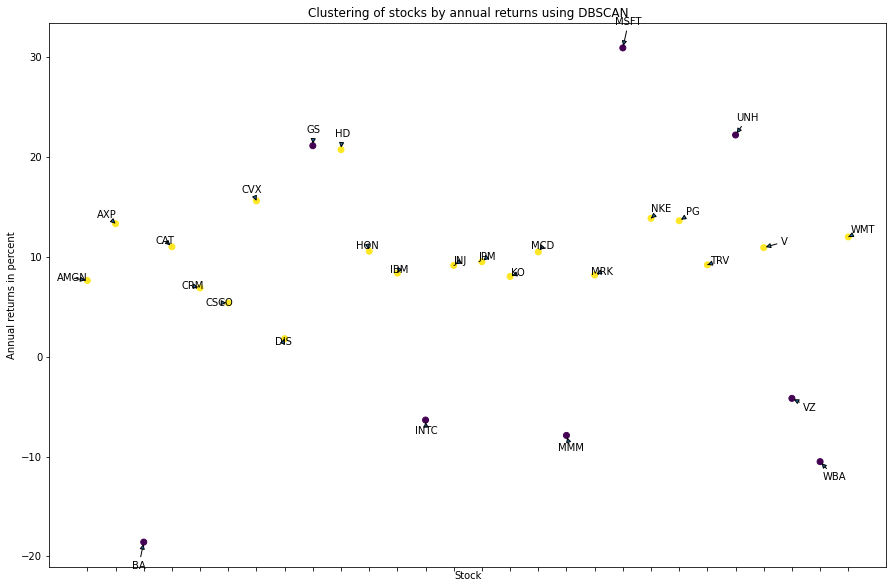

In [68]:
#Scatter plot to show clusters created for each stock every year
plt.figure(figsize=(15, 10))
plt.scatter(stock_df_avg['stock'], stock_df_avg['annual_returns'], c= clusters)
plt.xlabel('Stock')
plt.ylabel('Annual returns in percent')
plt.title('Clustering of stocks by annual returns using DBSCAN')
plt.tick_params(labelbottom=False) 

for i, j in enumerate(stock_df_avg['stock']):
    x = i
    y = stock_df_avg.loc[i,'annual_returns']
    plt.annotate(stock_df_avg.loc[i,'stock'],(x, y),textcoords='offset points', arrowprops=dict(arrowstyle='-|>'), horizontalalignment='right', verticalalignment='top')

plt.show()

# Time Series Analysis

MMM
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2462.512
Date:                          Wed, 23 Nov 2022   AIC                           4935.024
Time:                                  15:19:01   BIC                           4959.532
Sample:                                       0   HQIC                          4944.341
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5447      0.558      0.976      0.329      -0.549       1.639
ma.L1         -0.5741      0.546     -1.050      0.

/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Price Increase 9.578490317720394
Percent Increase 8.463277636675883
MSE: 13.803
Correlation: 0.697
MMM


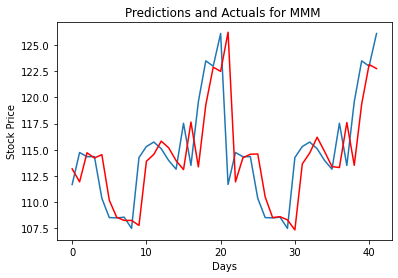

AXP
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2484.579
Date:                          Wed, 23 Nov 2022   AIC                           4979.158
Time:                                  15:21:39   BIC                           5003.667
Sample:                                       0   HQIC                          4988.476
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4657      1.308      0.356      0.722      -2.098       3.029
ma.L1         -0.4534      1.318     -0.344      0.

/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Price Increase 8.111606653737539
Percent Increase 5.859250694117656
MSE: 17.535
Correlation: 0.507
AXP


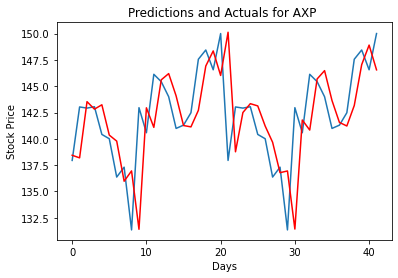

AMGN
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2653.344
Date:                          Wed, 23 Nov 2022   AIC                           5316.687
Time:                                  15:24:30   BIC                           5341.196
Sample:                                       0   HQIC                          5326.005
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9764      0.014     67.963      0.000       0.948       1.005
ma.L1         -0.9924      0.012    -82.540      0.

/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Price Increase 38.03863507088769
Percent Increase 16.44811487094364
MSE: 53.276
Correlation: 0.846
AMGN


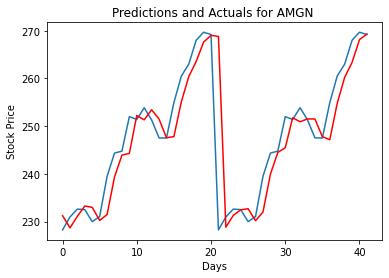

AAPL
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2294.872
Date:                          Wed, 23 Nov 2022   AIC                           4599.744
Time:                                  15:27:40   BIC                           4624.253
Sample:                                       0   HQIC                          4609.062
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4414      0.263      1.675      0.094      -0.075       0.958
ma.L1         -0.5091      0.254     -2.002      0.

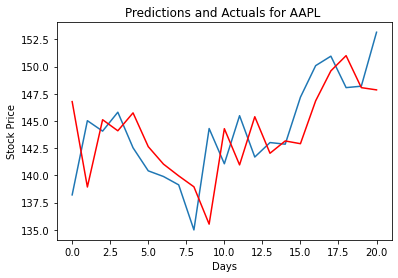

BA
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3417.415
Date:                          Wed, 23 Nov 2022   AIC                           6844.829
Time:                                  15:29:10   BIC                           6869.338
Sample:                                       0   HQIC                          6854.147
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6662      0.425     -1.566      0.117      -1.500       0.167
ma.L1          0.6448      0.433      1.489      0.

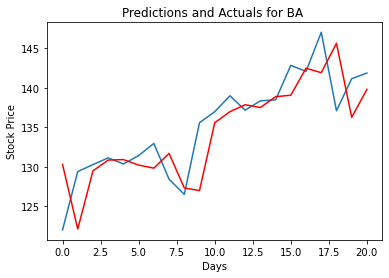

CAT
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2651.482
Date:                          Wed, 23 Nov 2022   AIC                           5312.964
Time:                                  15:30:43   BIC                           5337.473
Sample:                                       0   HQIC                          5322.282
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5604      0.979     -0.572      0.567      -2.480       1.359
ma.L1          0.5448      0.990      0.550      0.

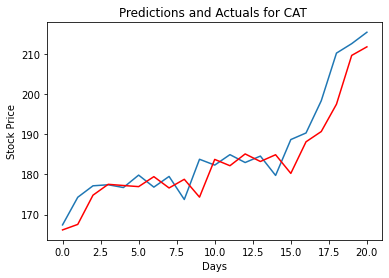

CVX
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2242.208
Date:                          Wed, 23 Nov 2022   AIC                           4494.416
Time:                                  15:31:56   BIC                           4518.925
Sample:                                       0   HQIC                          4503.734
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6532      0.344     -1.897      0.058      -1.328       0.022
ma.L1          0.6206      0.356      1.741      0.

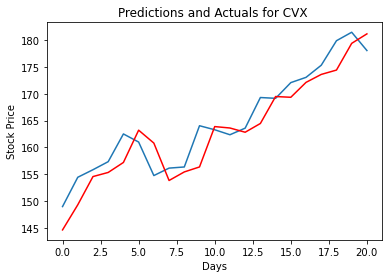

CSCO
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1250.231
Date:                          Wed, 23 Nov 2022   AIC                           2510.462
Time:                                  15:33:19   BIC                           2534.971
Sample:                                       0   HQIC                          2519.780
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5277      0.503      1.048      0.295      -0.459       1.514
ma.L1         -0.5639      0.489     -1.154      0.

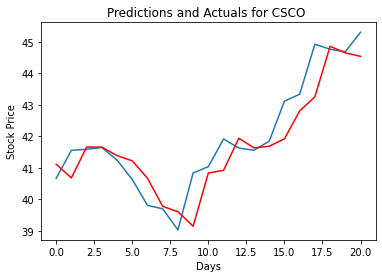

KO
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: U

                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1140.560
Date:                          Wed, 23 Nov 2022   AIC                           2291.121
Time:                                  15:34:21   BIC                           2315.629
Sample:                                       0   HQIC                          2300.438
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9784      0.049    -19.849      0.000      -1.075      -0.882
ma.L1          0.9841      0.047     20.750      0.

/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Price Increase 2.312607671681995
Percent Increase 4.0464717415935905
MSE: 0.873
Correlation: 0.861
KO


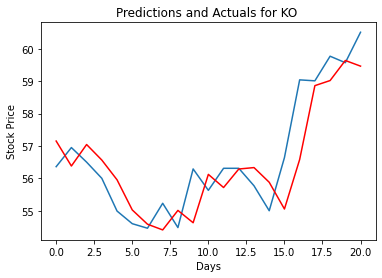

GS
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3092.699
Date:                          Wed, 23 Nov 2022   AIC                           6195.398
Time:                                  15:35:48   BIC                           6219.907
Sample:                                       0   HQIC                          6204.716
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4752      0.851      0.558      0.577      -1.193       2.143
ma.L1         -0.4529      0.864     -0.524      0.

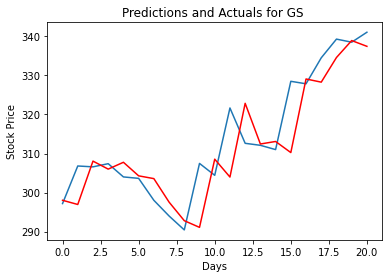

HD
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: U

                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2959.200
Date:                          Wed, 23 Nov 2022   AIC                           5928.401
Time:                                  15:37:14   BIC                           5952.909
Sample:                                       0   HQIC                          5937.718
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1776      1.610      0.110      0.912      -2.978       3.334
ma.L1         -0.1635      1.615     -0.101      0.

/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Price Increase 10.54512084715708
Percent Increase 3.774917977051545
MSE: 39.251
Correlation: 0.491
HD


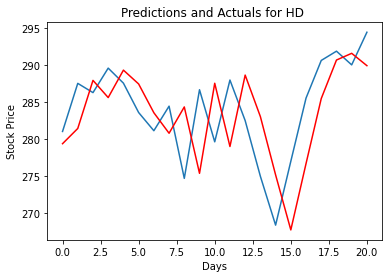

HON
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2513.423
Date:                          Wed, 23 Nov 2022   AIC                           5036.846
Time:                                  15:38:47   BIC                           5061.355
Sample:                                       0   HQIC                          5046.164
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4038      0.307     -1.315      0.189      -1.006       0.198
ma.L1          0.3481      0.316      1.101      0.

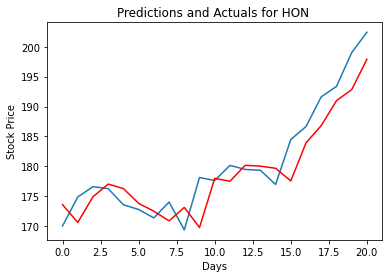

IBM
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2151.953
Date:                          Wed, 23 Nov 2022   AIC                           4313.906
Time:                                  15:40:20   BIC                           4338.415
Sample:                                       0   HQIC                          4323.224
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7808      0.250      3.125      0.002       0.291       1.271
ma.L1         -0.7514      0.265     -2.833      0.

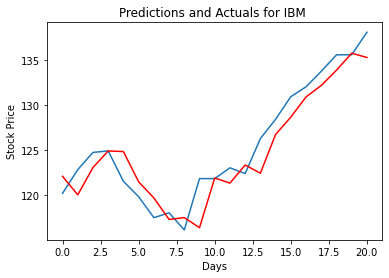

INTC
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: U

                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1541.306
Date:                          Wed, 23 Nov 2022   AIC                           3092.613
Time:                                  15:42:08   BIC                           3117.122
Sample:                                       0   HQIC                          3101.931
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3163      0.856     -0.370      0.712      -1.993       1.361
ma.L1          0.2870      0.864      0.332      0.

/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Price Increase 1.159614568846738
Percent Increase 4.31238997224686
MSE: 0.593
Correlation: 0.705
INTC


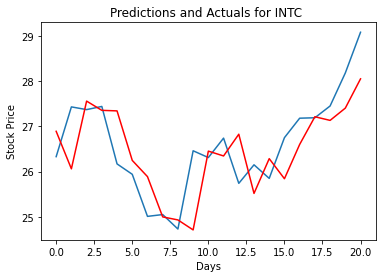

JNJ
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: U

                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2058.702
Date:                          Wed, 23 Nov 2022   AIC                           4127.405
Time:                                  15:43:26   BIC                           4151.913
Sample:                                       0   HQIC                          4136.722
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5856      0.321      1.824      0.068      -0.044       1.215
ma.L1         -0.6275      0.311     -2.019      0.

/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Price Increase 6.323201457915559
Percent Increase 3.797159745773727
MSE: 3.632
Correlation: 0.891
JNJ


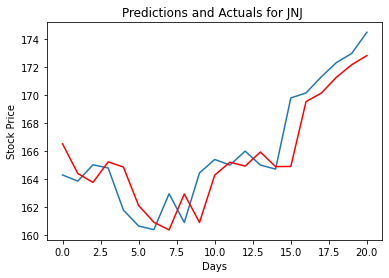

JPM
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2260.762
Date:                          Wed, 23 Nov 2022   AIC                           4531.524
Time:                                  15:44:46   BIC                           4556.033
Sample:                                       0   HQIC                          4540.842
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7561      0.572      1.322      0.186      -0.365       1.877
ma.L1         -0.7446      0.587     -1.269      0.

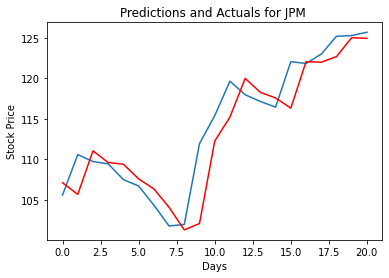

MCD
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2526.505
Date:                          Wed, 23 Nov 2022   AIC                           5063.011
Time:                                  15:46:06   BIC                           5087.520
Sample:                                       0   HQIC                          5072.329
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1291      0.238     -0.542      0.588      -0.596       0.338
ma.L1          0.0642      0.243      0.265      0.

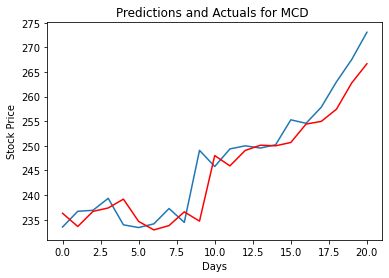

MRK
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1556.226
Date:                          Wed, 23 Nov 2022   AIC                           3122.452
Time:                                  15:47:37   BIC                           3146.961
Sample:                                       0   HQIC                          3131.770
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9552      0.023     42.442      0.000       0.911       0.999
ma.L1         -0.9813      0.016    -60.859      0.

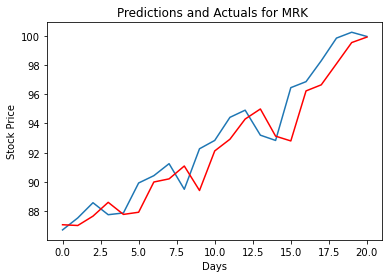

MSFT
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: U

                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2779.828
Date:                          Wed, 23 Nov 2022   AIC                           5569.655
Time:                                  15:49:10   BIC                           5594.164
Sample:                                       0   HQIC                          5578.973
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4219      0.252      1.674      0.094      -0.072       0.916
ma.L1         -0.4955      0.242     -2.049      0.

/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Price Increase -13.089209083329536
Percent Increase -5.46735519959902
MSE: 49.685
Correlation: 0.545
MSFT


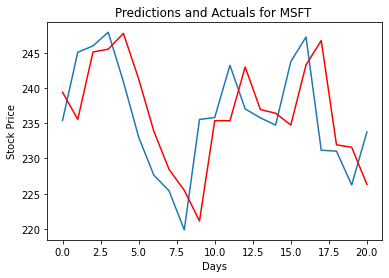

NKE
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2272.217
Date:                          Wed, 23 Nov 2022   AIC                           4554.433
Time:                                  15:50:48   BIC                           4578.942
Sample:                                       0   HQIC                          4563.751
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6417      0.687      0.934      0.351      -0.705       1.989
ma.L1         -0.6594      0.672     -0.981      0.

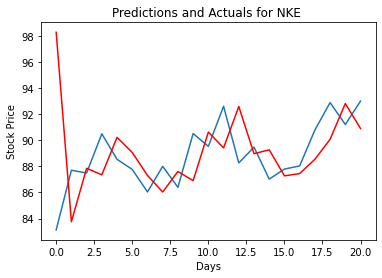

PG
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1960.224
Date:                          Wed, 23 Nov 2022   AIC                           3930.448
Time:                                  15:52:04   BIC                           3954.957
Sample:                                       0   HQIC                          3939.766
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6784      0.115      5.883      0.000       0.452       0.904
ma.L1         -0.7582      0.104     -7.283      0.

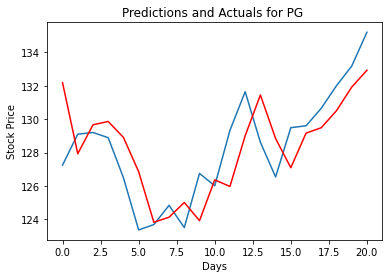

CRM
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2972.776
Date:                          Wed, 23 Nov 2022   AIC                           5955.551
Time:                                  15:53:27   BIC                           5980.060
Sample:                                       0   HQIC                          5964.869
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1965      1.337      0.147      0.883      -2.424       2.817
ma.L1         -0.1762      1.340     -0.131      0.

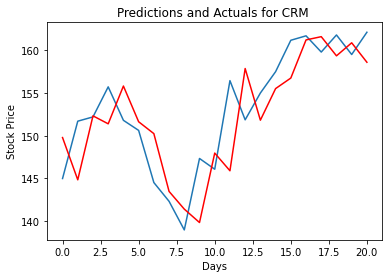

TRV
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2227.259
Date:                          Wed, 23 Nov 2022   AIC                           4464.517
Time:                                  15:55:05   BIC                           4489.026
Sample:                                       0   HQIC                          4473.835
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1707      0.649     -0.263      0.793      -1.443       1.102
ma.L1          0.1333      0.657      0.203      0.

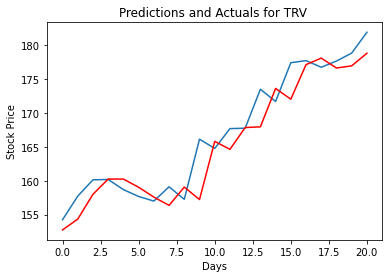

UNH
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3235.324
Date:                          Wed, 23 Nov 2022   AIC                           6480.648
Time:                                  15:56:41   BIC                           6505.157
Sample:                                       0   HQIC                          6489.966
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2850      0.321     -0.887      0.375      -0.915       0.345
ma.L1          0.2109      0.324      0.650      0.

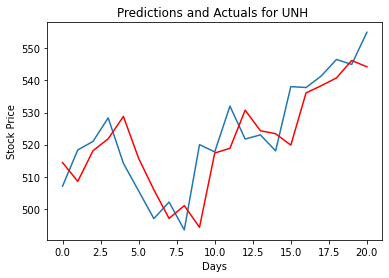

VZ
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: U

                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1002.829
Date:                          Wed, 23 Nov 2022   AIC                           2015.657
Time:                                  15:57:58   BIC                           2040.166
Sample:                                       0   HQIC                          2024.975
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.057     16.135      0.000       0.812       1.037
ma.L1         -0.9517      0.047    -20.154      0.

/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Price Increase -2.355139961381191
Percent Increase -6.013522944889804
MSE: 0.654
Correlation: 0.810
VZ


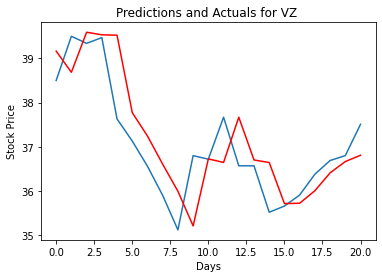

V
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2696.249
Date:                          Wed, 23 Nov 2022   AIC                           5402.499
Time:                                  15:59:18   BIC                           5427.008
Sample:                                       0   HQIC                          5411.817
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2856      0.181     -1.577      0.115      -0.641       0.069
ma.L1          0.1700      0.187      0.910      0.

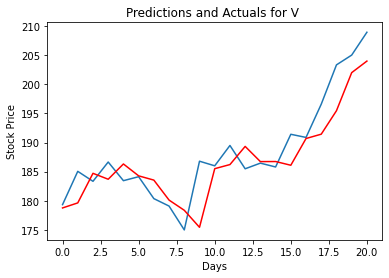

WBA
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1460.263
Date:                          Wed, 23 Nov 2022   AIC                           2930.526
Time:                                  16:00:49   BIC                           2955.034
Sample:                                       0   HQIC                          2939.844
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1519      0.392      0.388      0.698      -0.616       0.920
ma.L1         -0.0862      0.402     -0.214      0.

/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Price Increase 2.83348152375531
Percent Increase 8.643413094938946
MSE: 0.690
Correlation: 0.838
WBA


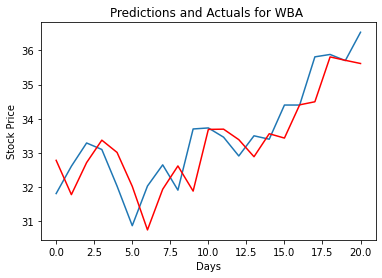

WMT
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2055.644
Date:                          Wed, 23 Nov 2022   AIC                           4121.287
Time:                                  16:02:39   BIC                           4145.796
Sample:                                       0   HQIC                          4130.605
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4066      0.794     -0.512      0.608      -1.962       1.149
ma.L1          0.4243      0.784      0.541      0.

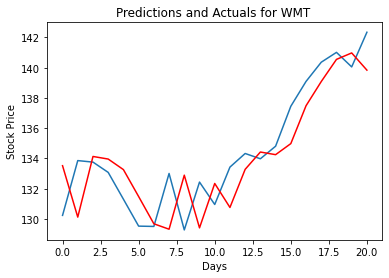

DIS
[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 1007
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2445.854
Date:                          Wed, 23 Nov 2022   AIC                           4901.708
Time:                                  16:04:14   BIC                           4926.217
Sample:                                       0   HQIC                          4911.026
                                         - 1007                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3101      0.287     -1.082      0.279      -0.872       0.251
ma.L1          0.2271      0.296      0.766      0.

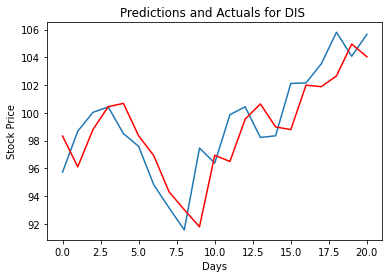

In [29]:
#This runs the SARIMA model on all the tickers and stores the data in the predicted_df
#The ticker list has removed the low perfroming stocks after the clustering experiemnt
ticker_list=['AXP', 'AMGN', 'AAPL', 'CAT', 'CVX', 'CSCO', 'KO', 'GS', 'HD', 'HON', 'IBM', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'V', 'WMT', 'DIS']
df_dict = {}
actuals_dict = {}
for name in ticker_list:
    df_dict[name] = stock_df.loc[stock_df["ticker"] == name]
    df_dict[name] = df_dict[name].loc[stock_df["ticker"] == name]
    df_dict[name] = df_dict[name][['Date', 'Open']]
    df_dict[name].columns = ['ds', 'y']
    
    getDataActuals(name)
    actuals_dict[name] = Actuals_df.loc[Actuals_df["ticker"] == name]
    actuals_dict[name].reset_index(inplace=True)
    
    actuals_dict[name] = actuals_dict[name][['Date','Open']]
    actuals_dict[name] = actuals_dict[name].rename(columns={'Open':'Price'})
    df_dict[name] = df_dict[name]['y']
    df_dict[name] =  df_dict[name].squeeze()
    actuals_dict[name] = actuals_dict[name]['Price']
    actuals_dict[name] = actuals_dict[name].squeeze()
    
    # Fit model
    p, d, q, P, D, Q, s = 1, 1, 1, 1, 1, 1, 12 # Parameters of SARIMA model
    model = ARIMA(df_dict[name], order = (p, d, q), seasonal_order = (P, D, Q, s))
    fitted_model = model.fit()
    print(fitted_model.summary())

    # Make predictions
    n_test = 21 
    p, d, q, P, D, Q, s = 1, 1, 1, 1, 1, 1, 12
    ticker = name
    make_predictions(ticker, predicted_df, df_dict[name], actuals_dict[name], n_test, p, d, q, P, D, Q, s)
    
    

In [30]:
#Calculating the percent error and adding a column to the data frame
predicted_df['Percent Error'] = abs(predicted_df['Predicted Percent Increase'] - predicted_df['Actual Percent Increase'])/predicted_df['Actual Percent Increase']*100
predicted_df

,Stock,Predicted Price Increase,Predicted Percent Increase,Actual Price Increase,Actual Percent Increase,Correlation,MSE,Percent Error
0,MMM,9.578490,8.463278,14.409996,12.901778,0.697152,13.803479,34.402237
1,AXP,8.111607,5.859251,12.050003,8.735051,0.506576,17.535385,32.922539
2,AMGN,38.038635,16.448115,40.930008,17.930524,0.845948,53.276052,8.267517
3,AAPL,1.078201,0.734551,14.949997,10.816870,0.529204,16.084410,93.209213
4,BA,9.522657,7.309049,19.880005,16.295086,0.766492,17.570340,55.145688
5,CAT,45.530669,27.398444,47.910004,28.614947,0.936605,26.179197,4.251286
6,CVX,36.550185,25.273821,29.089996,19.527419,0.942281,12.724180,29.427350
7,CSCO,3.428224,8.338139,4.640003,11.408909,0.915037,0.550799,26.915544
8,KO,2.312608,4.046472,4.149998,7.363374,0.861208,0.873145,45.045958
9,GS,39.447140,13.236681,43.899994,14.772686,0.870262,61.108690,10.397605


In [31]:
#Sorted based on Predicted Percent Increase
Final_stock = predicted_df.sort_values(by=['Predicted Percent Increase'])
Final_stock

,Stock,Predicted Price Increase,Predicted Percent Increase,Actual Price Increase,Actual Percent Increase,Correlation,MSE,Percent Error
19,NKE,-7.374130,-7.503970,9.870003,11.872974,-0.123763,15.955296,163.202107
24,VZ,-2.355140,-6.013523,-0.990002,-2.571433,0.809806,0.654185,-133.858829
18,MSFT,-13.089209,-5.467355,-1.650009,-0.700909,0.545466,49.684614,-680.038161
20,PG,0.745164,0.563751,7.949997,6.247542,0.716290,4.927021,90.976440
3,AAPL,1.078201,0.734551,14.949997,10.816870,0.529204,16.084410,93.209213
10,HD,10.545121,3.774918,13.410004,4.772243,0.491189,39.250605,20.898459
14,JNJ,6.323201,3.797160,10.230011,6.226801,0.890558,3.631914,39.019093
8,KO,2.312608,4.046472,4.149998,7.363374,0.861208,0.873145,45.045958
13,INTC,1.159615,4.312390,2.750000,10.444360,0.704683,0.592698,58.710826
27,WMT,6.313578,4.728463,12.099991,9.290533,0.845318,4.637528,49.104504


In [32]:
#Takes the top 5 predicted performance of the stock
Final_stock = Final_stock.iloc[-5:]
Final_stock.reset_index(inplace=True)
Final_stock

,index,Stock,Predicted Price Increase,Predicted Percent Increase,Actual Price Increase,Actual Percent Increase,Correlation,MSE,Percent Error
0,2,AMGN,38.038635,16.448115,40.930008,17.930524,0.845948,53.276052,8.267517
1,15,JPM,17.814414,16.628937,20.079994,19.011545,0.919006,10.297189,12.532428
2,22,TRV,26.086615,17.080035,27.679993,17.946053,0.949092,9.695442,4.825670
3,6,CVX,36.550185,25.273821,29.089996,19.527419,0.942281,12.724180,29.427350
4,5,CAT,45.530669,27.398444,47.910004,28.614947,0.936605,26.179197,4.251286


In [33]:
#Adding SPY to get the data and it will be removed later
#Converting the final 5 into a list
Final_list = Final_stock['Stock'].tolist()
Final_list.append('SPY')
Final_list

['AMGN', 'JPM', 'TRV', 'CVX', 'CAT', 'SPY']

# Portfolio Optimization

In [34]:
#Gets the data and puts them in csv files for portfolio optimization analysis
for symbol in Final_list:        
    getDataActuals(symbol)
    name = Actuals_df.loc[Actuals_df["ticker"] == symbol]
    name = name.drop(columns=['ticker'])
    name.to_csv("./data/{}.csv".format(str(symbol), index='False'))

AMGN
[*********************100%***********************]  1 of 1 completed
JPM


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)


[*********************100%***********************]  1 of 1 completed
TRV


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)


[*********************100%***********************]  1 of 1 completed
CVX


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)


[*********************100%***********************]  1 of 1 completed
CAT


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)


[*********************100%***********************]  1 of 1 completed
SPY


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)


[*********************100%***********************]  1 of 1 completed


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/1091181010.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actuals_df = Actuals_df.append(data)


In [35]:
#SPY is not part of the portfolio 
Final_list.remove('SPY')
Final_list

['AMGN', 'JPM', 'TRV', 'CVX', 'CAT']

In [36]:
#Functions to get the data for SPY and the portfolio tickers
def symbol_to_path(symbol, base_dir=None): 
    #The CSV files are written givene the ticker
    if base_dir is None: 
        base_dir = os.environ.get("MARKET_DATA_DIR", "/Users/kash/Desktop/Fall 2022/data") 
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates, addSPY=True, colname="Adj Close", ):    
    df = pd.DataFrame(index=dates)  
    if addSPY and "SPY" not in symbols: 
        symbols = ["SPY"] + list( 
            symbols  
        ) 
    for symbol in symbols: 
        df_temp = pd.read_csv( 
            symbol_to_path(symbol),  
            index_col="Date", 
            parse_dates=True,
            usecols=["Date", colname],
            na_values=["nan"],
        ) 
        df_temp = df_temp.rename(columns={colname: symbol}) 
        df = df.join(df_temp) 
        if symbol == "SPY":
            df = df.dropna(subset=["SPY"])
   
    return df 

In [37]:
#Function for plotting the data
def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):  
    ax = df.plot(title=title, fontsize=12) 
    ax.figure(figsize=(10, 10))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)  
    plt.show() 

In [38]:
#This the function which needs to be optimized 
#returns the negative Sharpe ratio so it is minimized
def opt_sr(allocs, prices):
    start_val = 1000000
    for i in prices:
        prices[i] = prices[i]/prices[i].iloc[0]

    normalized = prices
    alloced = normalized * allocs
    pos_val = alloced * start_val
    port_val = pos_val.sum(axis=1) # daily portfolio value
    daily_returns = (port_val / port_val.shift(1)) - 1
    daily_returns = daily_returns[1:]#have to remove first values since it is always 0

    cr = (port_val[-1] / port_val[0]) - 1
    adr = daily_returns.mean()
    sddr = daily_returns.std()
    k = math.sqrt(252)
    sr = k * (adr / sddr)

    return -1 * sr

In [39]:
#This function finds the optimal allocation for the portfolio using Sharpe ratio. 
def optimize_portfolio(
    sd=datetime.datetime(2022, 10, 1),
    ed=datetime.datetime(2022, 10, 31),
    syms=Final_list,
    gen_plot=True,
):

    # Read in adjusted closing prices for given symbols, date range
    dates = pd.date_range(sd, ed)
    prices_all = get_data(syms, dates)
    prices = prices_all[syms]
    prices_SPY = prices_all["SPY"]


    #intial guess needs to be provided and it is given as an equal distribution 
    initial_guess = []
    for i in range(len(syms)):
        initial_guess.append((1/len(syms)))

    ranges = []
    for i in range(len(syms)):
        ranges.append((0,1))
    ranges = tuple(ranges)
    cons = {'type': 'eq', 'fun': lambda x: 1.0 - sum(x)}
    #This calls the minimize function in scipy with the parameters calculated above
    allocs = spo.minimize(opt_sr, initial_guess, args = prices, method = 'SLSQP',bounds = ranges, constraints = cons, options={'disp':True})

    start_val = 1000000

    for i in prices:
        prices[i] = prices[i]/prices[i].iloc[0]
    normalized = prices
    allocs = allocs.x
    alloced = normalized * allocs
    pos_val = alloced * start_val
    port_val = pos_val.sum(axis=1)
    daily_returns = (port_val / port_val.shift(1)) - 1
    daily_returns = daily_returns[1:]

    cr = (port_val[-1] / port_val[0]) - 1
    adr = daily_returns.mean()
    sddr = daily_returns.std()
    k = math.sqrt(252)
    sr = k * (adr / sddr)

    port_val_spy = prices_SPY

    # Compare daily portfolio value with SPY using a normalized plot 
    if gen_plot:
        port_val = port_val/port_val.iloc[0]
        prices_SPY = prices_SPY/prices_SPY.iloc[0]
        df_temp = pd.concat(
            [port_val, prices_SPY], keys=["Portfolio", "SPY"], axis=1
        )
        plt.figure(figsize=(15, 10))
        plt.plot(df_temp)
        plt.title("Daily Portfolio Value and SPY")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend(['Portfolio', 'SPY'])
        
        plt.show()
        pass

    return allocs, cr, adr, sddr, sr


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/904919830.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices[i] = prices[i]/prices[i].iloc[0]


Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.2808938554833396
            Iterations: 5
            Function evaluations: 31
            Gradient evaluations: 5


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/2232063977.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices[i] = prices[i]/prices[i].iloc[0]


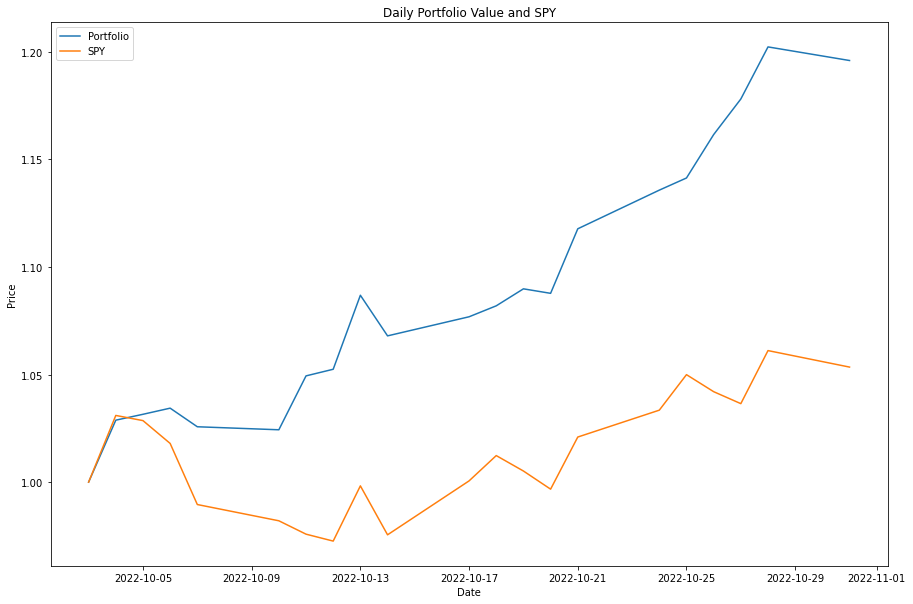

Start Date: 2022-10-01 00:00:00
End Date: 2022-10-31 00:00:00
Symbols: ['AMGN', 'JPM', 'TRV', 'CVX', 'CAT']
Allocations:[0.42200128 0.01086919 0.         0.41910927 0.14802027]
Sharpe Ratio: 1.2808938554833396
Volatility (stdev of daily returns): 0.0022329384607810195
Average Daily Return: 0.0001801729652446669
Cumulative Return: 0.19595619618443005


In [40]:
#This code runs the above functions and provides the comparision graph
def test_code():
    
    start_date = datetime.datetime(2022, 10, 1)
    end_date = datetime.datetime(2022, 10, 31)
    symbols = Final_list


    # Assess the optimized portfolio
    allocations, cr, adr, sddr, sr = optimize_portfolio(
        sd=start_date, ed=end_date, syms=symbols, gen_plot=True
    )

    print(f"Start Date: {start_date}")
    print(f"End Date: {end_date}")
    print(f"Symbols: {symbols}")
    print(f"Allocations:{allocations}")
    print(f"Sharpe Ratio: {sr}")
    print(f"Volatility (stdev of daily returns): {sddr}")
    print(f"Average Daily Return: {adr}")
    print(f"Cumulative Return: {cr}")


if __name__ == "__main__":
    test_code()

In [41]:
#After running sentiment analysis model, it was determined that TRV should be removed from the portfolio
Final_list.remove('TRV')
Final_list

['AMGN', 'JPM', 'CVX', 'CAT']

/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/904919830.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices[i] = prices[i]/prices[i].iloc[0]


Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.8173981746812613
            Iterations: 6
            Function evaluations: 31
            Gradient evaluations: 6


/var/folders/_w/g9q6l1qn2b1f6gktq8rlbxvr0000gn/T/ipykernel_4752/2232063977.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices[i] = prices[i]/prices[i].iloc[0]


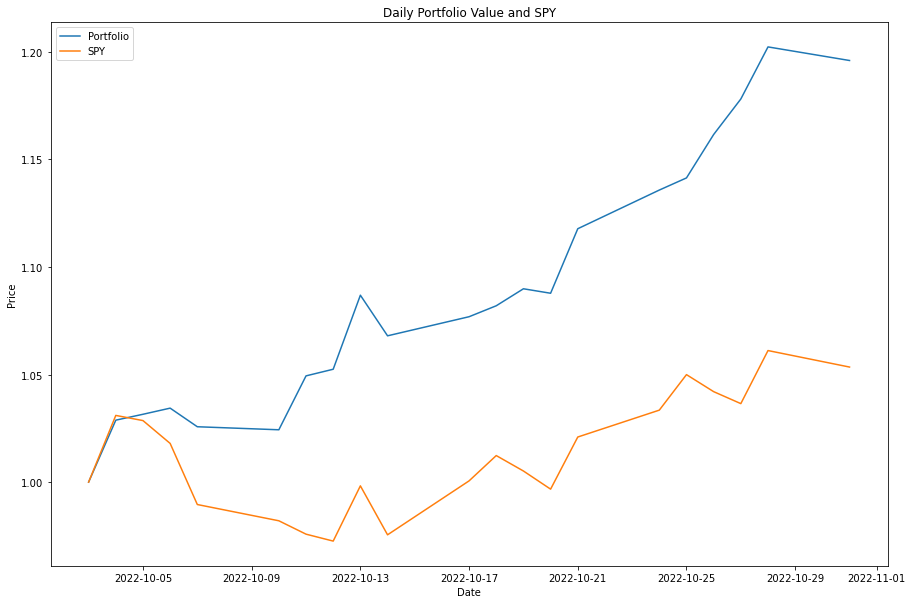

Start Date: 2022-10-01 00:00:00
End Date: 2022-10-31 00:00:00
Symbols: ['AMGN', 'JPM', 'CVX', 'CAT']
Allocations:[0.42210191 0.01093495 0.41933093 0.14763221]
Sharpe Ratio: 1.8173981746812613
Volatility (stdev of daily returns): 0.003150150964653146
Average Daily Return: 0.00036064605349141193
Cumulative Return: 0.19592221977961266


In [42]:
test_code()